In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white')

df = pd.read_csv('../Data/hitters.csv')
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [140]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64(1), 

In [141]:
# fig, ax = plt.figure(figsize=(12, 8)), plt.axes()
# sns.heatmap(df.corr(), annot=True)

In [142]:
df = pd.get_dummies(data = df, columns = ["League", "Division", "NewLeague"], drop_first=True, dtype=int)
df.head(100)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,282,78,13,37,51,29,5,1649,453,73,211,280,138,670,57,5,500.0,0,1,0
127,380,120,5,54,51,31,8,3118,900,92,444,419,240,237,8,1,600.0,0,1,0
128,584,158,15,70,84,42,5,2358,636,58,265,316,134,331,20,4,662.5,1,0,1
129,570,169,21,72,88,38,7,3754,1077,140,492,589,263,295,15,5,950.0,0,1,0


In [143]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(DecisionTreeRegressor())

params = {'decisiontreeregressor__max_depth': list(range(1, 10))}

model_tree = GridSearchCV(estimator=pipe, param_grid=params, cv=6, scoring='neg_mean_squared_error')

X, y = df[["CAtBat", "CHits", "CHmRun", "CRuns", "CRBI", "CWalks"]], df["Salary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_tree.fit(X_train, y_train)

fig = plt.figure(figsize=(16, 10))
model_tree.best_estimator_.get_params()
#plot_tree(model_tree, filled=True, impurity=False, rounded=False)

{'memory': None,
 'steps': [('decisiontreeregressor', DecisionTreeRegressor(max_depth=2))],
 'verbose': False,
 'decisiontreeregressor': DecisionTreeRegressor(max_depth=2),
 'decisiontreeregressor__ccp_alpha': 0.0,
 'decisiontreeregressor__criterion': 'squared_error',
 'decisiontreeregressor__max_depth': 2,
 'decisiontreeregressor__max_features': None,
 'decisiontreeregressor__max_leaf_nodes': None,
 'decisiontreeregressor__min_impurity_decrease': 0.0,
 'decisiontreeregressor__min_samples_leaf': 1,
 'decisiontreeregressor__min_samples_split': 2,
 'decisiontreeregressor__min_weight_fraction_leaf': 0.0,
 'decisiontreeregressor__random_state': None,
 'decisiontreeregressor__splitter': 'best'}

<Figure size 1600x1000 with 0 Axes>

In [144]:
from sklearn.metrics import mean_squared_error
y_pred = model_tree.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
procent_RMSE = 1 - (RMSE / y_test.mean())
procent_RMSE

0.21072870648843256

In [162]:
df = pd.read_csv('../Data/Default.csv')
df = pd.get_dummies(df, drop_first=True, dtype=int)
X, y = df.drop("default_Yes", axis='columns'), df["default_Yes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4841
           1       0.33      0.32      0.33       159

    accuracy                           0.96      5000
   macro avg       0.66      0.65      0.65      5000
weighted avg       0.96      0.96      0.96      5000



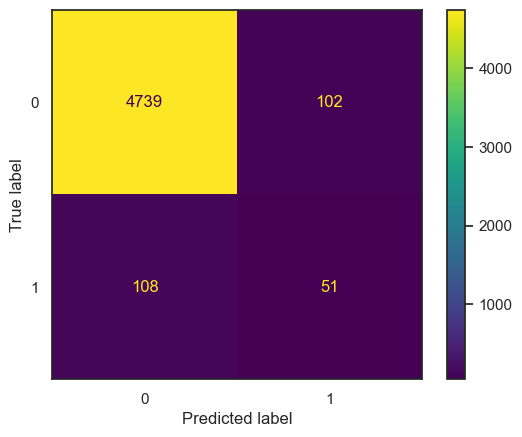

In [163]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()